## Retail Sales Index, (2017 = 100), In Chained Volume Terms, Monthly, Seasonally Adjusted

In [1]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

In [2]:
# Request data for Retail Sales Index, (2017 = 100), In Chained Volume Terms, Monthly, Seasonally Adjusted
chained_volume_datasets_id = "d_0cd4e1d703f04efda7dcf64485c950cc"
chained_volume_url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + chained_volume_datasets_id

chained_volume_response = requests.get(chained_volume_url)
print(chained_volume_response.json())

{'help': 'https://data.gov.sg/api/3/action/help_show?name=datastore_search', 'success': True, 'result': {'resource_id': 'd_0cd4e1d703f04efda7dcf64485c950cc', 'fields': [{'type': 'text', 'id': 'DataSeries'}, {'type': 'numeric', 'id': '2025Aug'}, {'type': 'numeric', 'id': '2025Jul'}, {'type': 'numeric', 'id': '2025Jun'}, {'type': 'numeric', 'id': '2025May'}, {'type': 'numeric', 'id': '2025Apr'}, {'type': 'numeric', 'id': '2025Mar'}, {'type': 'numeric', 'id': '2025Feb'}, {'type': 'numeric', 'id': '2025Jan'}, {'type': 'numeric', 'id': '2024Dec'}, {'type': 'numeric', 'id': '2024Nov'}, {'type': 'numeric', 'id': '2024Oct'}, {'type': 'numeric', 'id': '2024Sep'}, {'type': 'numeric', 'id': '2024Aug'}, {'type': 'numeric', 'id': '2024Jul'}, {'type': 'numeric', 'id': '2024Jun'}, {'type': 'numeric', 'id': '2024May'}, {'type': 'numeric', 'id': '2024Apr'}, {'type': 'numeric', 'id': '2024Mar'}, {'type': 'numeric', 'id': '2024Feb'}, {'type': 'numeric', 'id': '2024Jan'}, {'type': 'numeric', 'id': '2023De

In [3]:
# Load the requested data into pandas dataframe
chained_volume_json = chained_volume_response.json()
chained_volume_records = chained_volume_json['result']['records']
chained_volume_df = pd.DataFrame(chained_volume_records)
chained_volume_df

,_id,DataSeries,2025Aug,2025Jul,2025Jun,2025May,2025Apr,2025Mar,2025Feb,2025Jan,...,1985Oct,1985Sep,1985Aug,1985Jul,1985Jun,1985May,1985Apr,1985Mar,1985Feb,1985Jan
0,1,Total,100.874,100.241,96.944,98.423,94.6,98.43,100.13,95.5,...,22.83,23.637,23.336,22.998,22.886,24.552,23.729,29.766,30.554,29.718
1,2,Department Stores,73.949,83.541,82.163,79.55,76.727,83.763,79.597,80.935,...,na,na,na,na,na,na,na,na,na,na
2,3,Supermarkets & Hypermarkets,119.627,121.491,111.885,116.815,111.073,111.69,109.825,114.862,...,na,na,na,na,na,na,na,na,na,na
3,4,Mini-Marts & Convenience Stores,78.99,79.995,75.469,78.793,80.551,76.403,81.467,72.918,...,88.906,90.43,92.591,88.739,79.59,89.261,88.39,86.195,114.463,83.961
4,5,Food & Alcohol,96.932,99.325,94.975,98.541,101.178,97.507,105.933,106.076,...,na,na,na,na,na,na,na,na,na,na
5,6,Motor Vehicles,70.079,73.37,67.429,70.194,63.583,63.94,70.943,64.355,...,5.665,6.066,5.901,6.182,5.636,7.369,7.008,9.67,10.147,10.056
6,7,Petrol Service Stations,81.35,80.961,78.982,78.066,78.451,80.884,80.479,77.628,...,79.135,77.777,75.256,73.814,73.887,75.09,74.57,72.568,84.485,90.211
7,8,"Cosmetics, Toiletries & Medical Goods",111.012,105.092,106.64,106.916,103.519,103.748,106.431,103.629,...,na,na,na,na,na,na,na,na,na,na
8,9,Wearing Apparel & Footwear,131.524,124.756,123.216,126.769,116.424,126.662,126.983,131.567,...,na,na,na,na,na,na,na,na,na,na
9,10,Furniture & Household Equipment,119.758,109.39,110.304,109.721,107.341,105.677,105.643,107.558,...,34.577,38.119,35.983,38.767,39.012,51.059,45.694,46.395,44.806,48.585


In [4]:
# Reset index and drop the original index column
chained_volume_df.set_index("DataSeries", inplace = True)
chained_volume_df.drop(columns = "_id",inplace = True)
chained_volume_df

,2025Aug,2025Jul,2025Jun,2025May,2025Apr,2025Mar,2025Feb,2025Jan,2024Dec,2024Nov,...,1985Oct,1985Sep,1985Aug,1985Jul,1985Jun,1985May,1985Apr,1985Mar,1985Feb,1985Jan
DataSeries,,,,,,,,,,,,,,,,,,,,,
Total,100.874,100.241,96.944,98.423,94.6,98.43,100.13,95.5,92.397,95.722,...,22.83,23.637,23.336,22.998,22.886,24.552,23.729,29.766,30.554,29.718
Department Stores,73.949,83.541,82.163,79.55,76.727,83.763,79.597,80.935,79.686,80.89,...,na,na,na,na,na,na,na,na,na,na
Supermarkets & Hypermarkets,119.627,121.491,111.885,116.815,111.073,111.69,109.825,114.862,108.577,109.296,...,na,na,na,na,na,na,na,na,na,na
Mini-Marts & Convenience Stores,78.99,79.995,75.469,78.793,80.551,76.403,81.467,72.918,72.284,74.672,...,88.906,90.43,92.591,88.739,79.59,89.261,88.39,86.195,114.463,83.961
Food & Alcohol,96.932,99.325,94.975,98.541,101.178,97.507,105.933,106.076,104.657,102.953,...,na,na,na,na,na,na,na,na,na,na
Motor Vehicles,70.079,73.37,67.429,70.194,63.583,63.94,70.943,64.355,65.319,61.351,...,5.665,6.066,5.901,6.182,5.636,7.369,7.008,9.67,10.147,10.056
Petrol Service Stations,81.35,80.961,78.982,78.066,78.451,80.884,80.479,77.628,79.472,80.664,...,79.135,77.777,75.256,73.814,73.887,75.09,74.57,72.568,84.485,90.211
"Cosmetics, Toiletries & Medical Goods",111.012,105.092,106.64,106.916,103.519,103.748,106.431,103.629,100.358,101.816,...,na,na,na,na,na,na,na,na,na,na
Wearing Apparel & Footwear,131.524,124.756,123.216,126.769,116.424,126.662,126.983,131.567,123.267,134.518,...,na,na,na,na,na,na,na,na,na,na


In [5]:
# Transpose the DataFrame so that the index are the dates
chained_volume_T = chained_volume_df.transpose()
chained_volume_T

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles)
2025Aug,100.874,73.949,119.627,78.99,96.932,70.079,81.35,111.012,131.524,119.758,125.882,96.435,139.858,80.692,88.456,106.032
2025Jul,100.241,83.541,121.491,79.995,99.325,73.37,80.961,105.092,124.756,109.39,119.3,93.688,146.536,79.838,85.751,106.348
2025Jun,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.64,123.216,110.304,116.629,92.066,139.771,78.238,78.057,102.023
2025May,98.423,79.55,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,122.276,88.109,146.5,79.282,87.642,102.88
2025Apr,94.6,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,117.801,98.364,154.584,76.348,89.738,103.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985May,24.552,na,na,89.261,na,7.369,75.09,na,na,51.059,na,na,na,na,na,42.663
1985Apr,23.729,na,na,88.39,na,7.008,74.57,na,na,45.694,na,na,na,na,na,41.737
1985Mar,29.766,na,na,86.195,na,9.67,72.568,na,na,46.395,na,na,na,na,na,46.795
1985Feb,30.554,na,na,114.463,na,10.147,84.485,na,na,44.806,na,na,na,na,na,50.095


In [6]:
# Convert the index to datetime data type
chained_volume_T.index = pd.to_datetime(chained_volume_T.index, format = "%Y%b")
print(chained_volume_T.index.dtype)

datetime64[ns]


In [7]:
chained_volume_T.sort_index(ascending = False)

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles)
2025-08-01,100.874,73.949,119.627,78.99,96.932,70.079,81.35,111.012,131.524,119.758,125.882,96.435,139.858,80.692,88.456,106.032
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.37,80.961,105.092,124.756,109.39,119.3,93.688,146.536,79.838,85.751,106.348
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.64,123.216,110.304,116.629,92.066,139.771,78.238,78.057,102.023
2025-05-01,98.423,79.55,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,122.276,88.109,146.5,79.282,87.642,102.88
2025-04-01,94.6,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,117.801,98.364,154.584,76.348,89.738,103.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985-05-01,24.552,na,na,89.261,na,7.369,75.09,na,na,51.059,na,na,na,na,na,42.663
1985-04-01,23.729,na,na,88.39,na,7.008,74.57,na,na,45.694,na,na,na,na,na,41.737
1985-03-01,29.766,na,na,86.195,na,9.67,72.568,na,na,46.395,na,na,na,na,na,46.795
1985-02-01,30.554,na,na,114.463,na,10.147,84.485,na,na,44.806,na,na,na,na,na,50.095


In [8]:
# Convert all the column to float64 data type
chained_volume_T.replace(["na", "NA", "NaN", "null"], np.nan, inplace = True)

for col in chained_volume_T.columns:
    chained_volume_T[col] = pd.to_numeric(chained_volume_T[col], errors = "coerce")
    
chained_volume_T

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles)
2025-08-01,100.874,73.949,119.627,78.990,96.932,70.079,81.350,111.012,131.524,119.758,125.882,96.435,139.858,80.692,88.456,106.032
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,119.300,93.688,146.536,79.838,85.751,106.348
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,116.629,92.066,139.771,78.238,78.057,102.023
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,122.276,88.109,146.500,79.282,87.642,102.880
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,117.801,98.364,154.584,76.348,89.738,103.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985-05-01,24.552,NaN,NaN,89.261,NaN,7.369,75.090,NaN,NaN,51.059,NaN,NaN,NaN,NaN,NaN,42.663
1985-04-01,23.729,NaN,NaN,88.390,NaN,7.008,74.570,NaN,NaN,45.694,NaN,NaN,NaN,NaN,NaN,41.737
1985-03-01,29.766,NaN,NaN,86.195,NaN,9.670,72.568,NaN,NaN,46.395,NaN,NaN,NaN,NaN,NaN,46.795
1985-02-01,30.554,NaN,NaN,114.463,NaN,10.147,84.485,NaN,NaN,44.806,NaN,NaN,NaN,NaN,NaN,50.095


In [9]:
# Remove the leading and trailing white spaces in the columns name
# Handles \xa0 + spaces + quotes → PRISTINE names!
chained_volume_T.columns = chained_volume_T.columns.map(lambda x: str(x)
    .replace('\xa0', ' ').replace('\u00a0', ' ')  # Zap non-breaking spaces
    .strip()                                      # Outer whitespace
    .strip('"\'')                                 # Quotes from ends
    .strip())                                     # Final trim

In [10]:
chained_volume_T.columns

Index(['Total', 'Department Stores', 'Supermarkets & Hypermarkets',
       'Mini-Marts & Convenience Stores', 'Food & Alcohol', 'Motor Vehicles',
       'Petrol Service Stations', 'Cosmetics, Toiletries & Medical Goods',
       'Wearing Apparel & Footwear', 'Furniture & Household Equipment',
       'Recreational Goods', 'Watches & Jewellery',
       'Computer & Telecommunications Equipment', 'Optical Goods & Books',
       'Others', 'Total (Excluding Motor Vehicles)'],
      dtype='object', name='DataSeries')

In [11]:
chained_volume_T[chained_volume_T.isnull().any(axis = 1)]

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles)
2007-12-01,102.971,NaN,NaN,101.504,126.926,113.961,114.036,56.304,96.791,101.703,102.369,106.189,88.210,127.100,97.814,92.555
2007-11-01,101.732,NaN,NaN,100.664,127.449,114.681,114.325,55.513,99.920,100.785,111.070,112.653,85.916,126.321,97.862,94.011
2007-10-01,103.760,NaN,NaN,102.427,127.888,130.365,115.980,55.692,100.279,98.345,103.114,103.445,84.617,125.099,100.668,92.385
2007-09-01,105.745,NaN,NaN,109.766,126.777,133.643,120.026,54.297,97.306,98.549,100.618,107.161,83.400,122.944,95.918,93.400
2007-08-01,104.568,NaN,NaN,109.612,123.553,129.754,116.700,54.038,90.877,94.408,104.801,105.669,80.167,121.694,95.344,91.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985-05-01,24.552,NaN,NaN,89.261,NaN,7.369,75.090,NaN,NaN,51.059,NaN,NaN,NaN,NaN,NaN,42.663
1985-04-01,23.729,NaN,NaN,88.390,NaN,7.008,74.570,NaN,NaN,45.694,NaN,NaN,NaN,NaN,NaN,41.737
1985-03-01,29.766,NaN,NaN,86.195,NaN,9.670,72.568,NaN,NaN,46.395,NaN,NaN,NaN,NaN,NaN,46.795
1985-02-01,30.554,NaN,NaN,114.463,NaN,10.147,84.485,NaN,NaN,44.806,NaN,NaN,NaN,NaN,NaN,50.095


In [12]:
# Rows prior to 2008 contain null values
# In this case, we will only be using data starting from 2008 onwards
recent_chained_volume = chained_volume_T.loc['2008-01-01':].copy()
recent_chained_volume

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles)
2025-08-01,100.874,73.949,119.627,78.990,96.932,70.079,81.350,111.012,131.524,119.758,125.882,96.435,139.858,80.692,88.456,106.032
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,119.300,93.688,146.536,79.838,85.751,106.348
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,116.629,92.066,139.771,78.238,78.057,102.023
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,122.276,88.109,146.500,79.282,87.642,102.880
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,117.801,98.364,154.584,76.348,89.738,103.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,107.042,104.880,87.675,121.959,98.608,94.918
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,98.554,94.523,87.641,119.487,99.734,94.144
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,101.155,106.314,91.117,130.186,91.274,94.333
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,103.038,104.387,88.327,123.392,96.219,91.298


In [13]:
# Final check for null values and data type
recent_chained_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212 entries, 2025-08-01 to 2008-01-01
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Total                                    212 non-null    float64
 1   Department Stores                        212 non-null    float64
 2   Supermarkets & Hypermarkets              212 non-null    float64
 3   Mini-Marts & Convenience Stores          212 non-null    float64
 4   Food & Alcohol                           212 non-null    float64
 5   Motor Vehicles                           212 non-null    float64
 6   Petrol Service Stations                  212 non-null    float64
 7   Cosmetics, Toiletries & Medical Goods    212 non-null    float64
 8   Wearing Apparel & Footwear               212 non-null    float64
 9   Furniture & Household Equipment          212 non-null    float64
 10  Recreational Goods             

In [14]:
# Calculate the YoY pct change
recent_chained_volume.sort_index(ascending = True, inplace = True)
recent_chained_volume["Total YoY % Change"] = recent_chained_volume["Total"].pct_change(12)*100
recent_chained_volume

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles),Total YoY % Change
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,95.014,105.136,90.488,123.595,99.709,94.101,NaN
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,103.038,104.387,88.327,123.392,96.219,91.298,NaN
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,101.155,106.314,91.117,130.186,91.274,94.333,NaN
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,98.554,94.523,87.641,119.487,99.734,94.144,NaN
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,107.042,104.880,87.675,121.959,98.608,94.918,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,117.801,98.364,154.584,76.348,89.738,103.839,0.585865
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,122.276,88.109,146.500,79.282,87.642,102.880,2.017061
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,116.629,92.066,139.771,78.238,78.057,102.023,1.816960
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,119.300,93.688,146.536,79.838,85.751,106.348,4.428586


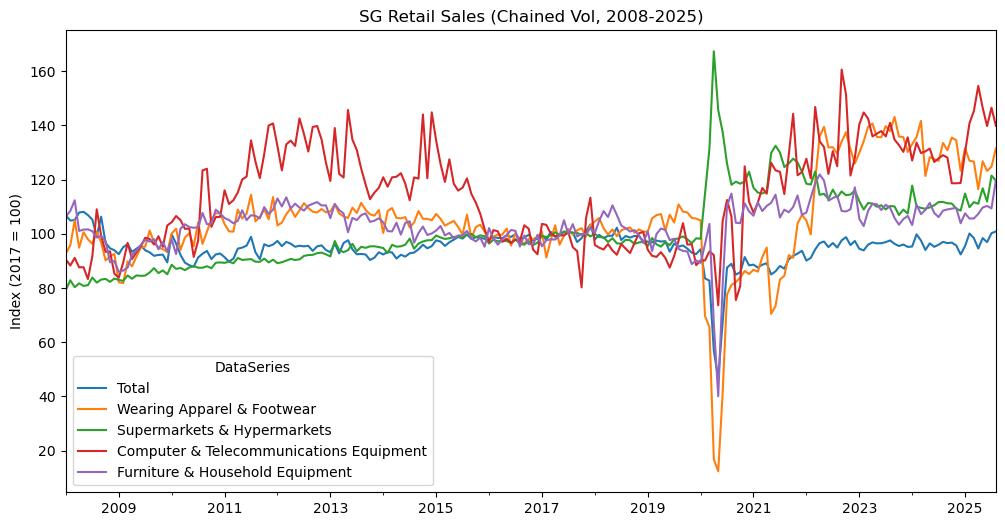

In [15]:
recent_chained_volume[["Total", "Wearing Apparel & Footwear", "Supermarkets & Hypermarkets", "Computer & Telecommunications Equipment", "Furniture & Household Equipment"]].plot(
                      title = "SG Retail Sales (Chained Vol, 2008-2025)", figsize = (12, 6), ylabel = "Index (2017 = 100)"  )

plt.show()

## Retail Sales Index, (2017 = 100), At Current Prices, Monthly, Seasonally Adjusted

In [16]:
# Requests for Current Price dataset
current_price_dataset_id = "d_96587181d80e9cb8a8b1984342c79a5f"
current_price_url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + current_price_dataset_id

current_price_response = requests.get(current_price_url)
print(current_price_response.status_code)

200


In [17]:
# Load the data into a pandas dataframe
current_price_json = current_price_response.json()
current_price_records = current_price_json["result"]["records"]
current_price_df = pd.DataFrame(current_price_records)
current_price_df

,_id,DataSeries,2025Sep,2025Aug,2025Jul,2025Jun,2025May,2025Apr,2025Mar,2025Feb,...,1985Oct,1985Sep,1985Aug,1985Jul,1985Jun,1985May,1985Apr,1985Mar,1985Feb,1985Jan
0,1,Total,108.066,109.628,108.905,104.83,105.914,105.016,105.17,107.806,...,22.12,22.919,22.914,22.53,22.311,24.267,23.514,29.11,29.646,28.829
1,2,Department Stores,81.537,70.521,79.084,78.887,75.523,72.698,80.258,77.048,...,na,na,na,na,na,na,na,na,na,na
2,3,Supermarkets & Hypermarkets,131.245,134.261,136.293,125.502,130.499,125.242,125.586,124.235,...,na,na,na,na,na,na,na,na,na,na
3,4,Mini-Marts & Convenience Stores,94.095,95.23,95.997,90.491,94.415,96.583,91.289,97.448,...,47.281,48.838,50.485,48.003,43.414,48.515,48.166,47.123,64.287,46.371
4,5,Food & Alcohol,118.234,119.749,120.873,115.402,119.005,122.347,115.951,121.484,...,na,na,na,na,na,na,na,na,na,na
5,6,Motor Vehicles,85.361,81.672,85.431,80.958,81.247,72.625,72.381,82.658,...,5.359,5.672,5.439,5.624,5.179,6.617,6.105,9.951,9.89,9.69
6,7,Petrol Service Stations,102.716,108.513,109.806,107.8,104.983,104.921,107.974,112.633,...,46.518,45.575,50.553,49.831,50.554,51.818,52.036,48.812,48.423,50.222
7,8,"Cosmetics, Toiletries & Medical Goods",104.029,109.754,104.501,105.018,105.134,102.395,103.569,106.114,...,na,na,na,na,na,na,na,na,na,na
8,9,Wearing Apparel & Footwear,116.444,121.387,113.991,115.722,114.535,110.525,117.458,118.181,...,na,na,na,na,na,na,na,na,na,na
9,10,Furniture & Household Equipment,113.259,119.823,111.926,113.858,112.28,110.557,106.723,113.212,...,41.65,44.117,42.821,47.208,47.006,63.751,59.256,58.945,59.693,60.604


In [18]:
# Drop id column and transpose the data
current_price_df.set_index("DataSeries", inplace = True)
current_price_df.drop(columns = "_id", inplace = True)
current_price_T = current_price_df.transpose()
current_price_T

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles)
2025Sep,108.066,81.537,131.245,94.095,118.234,85.361,102.716,104.029,116.444,113.259,121.51,152.479,124.23,81.52,80.513,113.074
2025Aug,109.628,70.521,134.261,95.23,119.749,81.672,108.513,109.754,121.387,119.823,121.457,151.483,129.397,83.482,87.378,115.794
2025Jul,108.905,79.084,136.293,95.997,120.873,85.431,109.806,104.501,113.991,111.926,113.715,144.038,133.374,82.12,86.269,114.082
2025Jun,104.83,78.887,125.502,90.491,115.402,80.958,107.8,105.018,115.722,113.858,112.377,137.553,126.397,79.817,79.577,110.095
2025May,105.914,75.523,130.499,94.415,119.005,81.247,104.983,105.134,114.535,112.28,115.637,133.614,133.04,81.163,86.01,111.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985May,24.267,na,na,48.515,na,6.617,51.818,na,na,63.751,na,na,na,na,na,36.151
1985Apr,23.514,na,na,48.166,na,6.105,52.036,na,na,59.256,na,na,na,na,na,35.722
1985Mar,29.11,na,na,47.123,na,9.951,48.812,na,na,58.945,na,na,na,na,na,40.016
1985Feb,29.646,na,na,64.287,na,9.89,48.423,na,na,59.693,na,na,na,na,na,41.982


In [19]:
# Set the index to datetime format
current_price_T.index = pd.to_datetime(current_price_T.index, format = "%Y%b")
current_price_T

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles)
2025-09-01,108.066,81.537,131.245,94.095,118.234,85.361,102.716,104.029,116.444,113.259,121.51,152.479,124.23,81.52,80.513,113.074
2025-08-01,109.628,70.521,134.261,95.23,119.749,81.672,108.513,109.754,121.387,119.823,121.457,151.483,129.397,83.482,87.378,115.794
2025-07-01,108.905,79.084,136.293,95.997,120.873,85.431,109.806,104.501,113.991,111.926,113.715,144.038,133.374,82.12,86.269,114.082
2025-06-01,104.83,78.887,125.502,90.491,115.402,80.958,107.8,105.018,115.722,113.858,112.377,137.553,126.397,79.817,79.577,110.095
2025-05-01,105.914,75.523,130.499,94.415,119.005,81.247,104.983,105.134,114.535,112.28,115.637,133.614,133.04,81.163,86.01,111.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985-05-01,24.267,na,na,48.515,na,6.617,51.818,na,na,63.751,na,na,na,na,na,36.151
1985-04-01,23.514,na,na,48.166,na,6.105,52.036,na,na,59.256,na,na,na,na,na,35.722
1985-03-01,29.11,na,na,47.123,na,9.951,48.812,na,na,58.945,na,na,na,na,na,40.016
1985-02-01,29.646,na,na,64.287,na,9.89,48.423,na,na,59.693,na,na,na,na,na,41.982


In [20]:
# Change the data type to numeric
current_price_T.replace(["na", "NA", "NaN", "null"], np.nan, inplace = True)

for col in current_price_T.columns:
    current_price_T[col] = pd.to_numeric(current_price_T[col], errors = "coerce")
    
current_price_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2025-09-01 to 1985-01-01
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Total                                        489 non-null    float64
 1       Department Stores                        213 non-null    float64
 2       Supermarkets & Hypermarkets              213 non-null    float64
 3       Mini-Marts & Convenience Stores          489 non-null    float64
 4       Food & Alcohol                           393 non-null    float64
 5       Motor Vehicles                           489 non-null    float64
 6       Petrol Service Stations                  489 non-null    float64
 7       Cosmetics, Toiletries & Medical Goods    393 non-null    float64
 8       Wearing Apparel & Footwear               393 non-null    float64
 9       Furniture & Household Equipment          489 non-null

In [21]:
# Remove the leading and trailing white spaces in the columns name
# Handles \xa0 + spaces + quotes → PRISTINE names!
current_price_T.columns = current_price_T.columns.map(lambda x: str(x)
    .replace('\xa0', ' ').replace('\u00a0', ' ')  # Zap non-breaking spaces
    .strip()                                      # Outer whitespace
    .strip('"\'')                                 # Quotes from ends
    .strip())                                     # Final trim

In [22]:
current_price_T.columns

Index(['Total', 'Department Stores', 'Supermarkets & Hypermarkets',
       'Mini-Marts & Convenience Stores', 'Food & Alcohol', 'Motor Vehicles',
       'Petrol Service Stations', 'Cosmetics, Toiletries & Medical Goods',
       'Wearing Apparel & Footwear', 'Furniture & Household Equipment',
       'Recreational Goods', 'Watches & Jewellery',
       'Computer & Telecommunications Equipment', 'Optical Goods & Books',
       'Others', 'Total (Excluding Motor Vehicles)'],
      dtype='object', name='DataSeries')

In [23]:
# Remove rows prior to 2008 to align with the dataset for chained volume
recent_current_price = current_price_T.loc["2008-01-01":].copy()
recent_current_price.isnull().sum()

DataSeries
Total                                      0
Department Stores                          0
Supermarkets & Hypermarkets                0
Mini-Marts & Convenience Stores            0
Food & Alcohol                             0
Motor Vehicles                             0
Petrol Service Stations                    0
Cosmetics, Toiletries & Medical Goods      0
Wearing Apparel & Footwear                 0
Furniture & Household Equipment            0
Recreational Goods                         0
Watches & Jewellery                        0
Computer & Telecommunications Equipment    0
Optical Goods & Books                      0
Others                                     0
Total (Excluding Motor Vehicles)           0
dtype: int64

In [24]:
# Calculate the YoY pct change
recent_current_price.sort_index(ascending = True, inplace = True)
recent_current_price["Total YoY % Change"] = recent_current_price["Total"].pct_change(12)*100
recent_current_price

DataSeries,Total,Department Stores,Supermarkets & Hypermarkets,Mini-Marts & Convenience Stores,Food & Alcohol,Motor Vehicles,Petrol Service Stations,"Cosmetics, Toiletries & Medical Goods",Wearing Apparel & Footwear,Furniture & Household Equipment,Recreational Goods,Watches & Jewellery,Computer & Telecommunications Equipment,Optical Goods & Books,Others,Total (Excluding Motor Vehicles),Total YoY % Change
2008-01-01,98.022,89.727,65.932,84.262,99.792,115.746,106.105,58.326,94.111,110.836,99.815,82.802,110.427,111.495,93.410,87.106,NaN
2008-02-01,101.584,90.165,70.095,87.146,102.383,127.216,107.094,55.070,94.598,112.452,106.912,81.896,106.931,111.259,90.316,88.046,NaN
2008-03-01,99.213,91.786,68.028,87.352,101.854,111.945,110.291,53.828,103.034,118.219,105.423,90.065,110.252,117.706,84.147,89.760,NaN
2008-04-01,101.266,90.820,69.677,90.630,96.791,129.205,110.831,56.494,92.777,105.443,102.561,75.715,106.209,108.304,92.111,87.040,NaN
2008-05-01,101.747,96.397,69.517,90.415,96.728,124.451,112.044,56.769,98.212,106.352,110.174,83.104,103.812,110.641,93.792,89.097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,105.914,75.523,130.499,94.415,119.005,81.247,104.983,105.134,114.535,112.280,115.637,133.614,133.040,81.163,86.010,111.354,1.157571
2025-06-01,104.830,78.887,125.502,90.491,115.402,80.958,107.800,105.018,115.722,113.858,112.377,137.553,126.397,79.817,79.577,110.095,2.437070
2025-07-01,108.905,79.084,136.293,95.997,120.873,85.431,109.806,104.501,113.991,111.926,113.715,144.038,133.374,82.120,86.269,114.082,4.780827
2025-08-01,109.628,70.521,134.261,95.230,119.749,81.672,108.513,109.754,121.387,119.823,121.457,151.483,129.397,83.482,87.378,115.794,5.098265


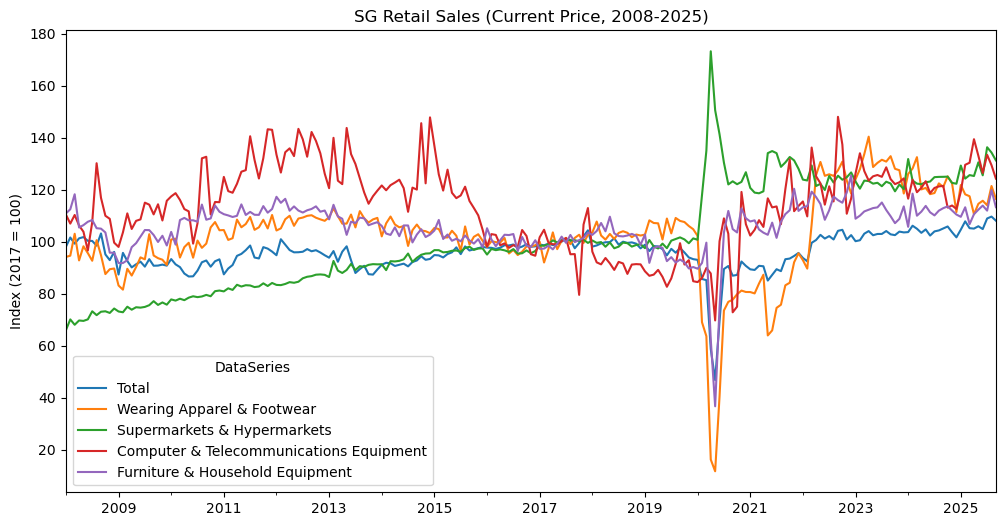

In [25]:
recent_current_price[["Total", "Wearing Apparel & Footwear", "Supermarkets & Hypermarkets", "Computer & Telecommunications Equipment", "Furniture & Household Equipment"]].plot(
                        title = "SG Retail Sales (Current Price, 2008-2025)", figsize = (12,6), ylabel = "Index (2017 = 100)")

plt.show()

## Online Retail Sales Proportion (Out Of The Respective Industry's Total Sales), Monthly

In [26]:
# Requests for Online Retail Sales dataset
online_sales_dataset_id = "d_65e4d47c3616d251f9a84ec1ad28f43c"
onlines_sales_url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + online_sales_dataset_id

online_sales_response = requests.get(onlines_sales_url)
print(online_sales_response.status_code)

200


In [27]:
# Load the data into a pandas dataframe
online_sales_response_json = online_sales_response.json()
online_sales_response_records = online_sales_response_json["result"]["records"]
online_sales_df = pd.DataFrame(online_sales_response_records)
online_sales_df

,_id,DataSeries,2025Aug,2025Jul,2025Jun,2025May,2025Apr,2025Mar,2025Feb,2025Jan,...,2018Oct,2018Sep,2018Aug,2018Jul,2018Jun,2018May,2018Apr,2018Mar,2018Feb,2018Jan
0,1,Retail Trade,13.1,13,13.5,12.3,12.7,13.4,12.5,11.7,...,5.6,5.5,4.7,4.7,4.4,4.5,4.6,4.3,4.1,4.4
1,2,Supermarkets & Hypermarkets,11.3,11.5,12.3,12.1,12.8,12.7,12.6,11,...,na,na,na,na,na,na,na,na,na,na
2,3,Computer & Telecommunications Equipment,54.5,54.1,55.7,50.1,50.8,52.3,52.3,50.8,...,na,na,na,na,na,na,na,na,na,na
3,4,Furniture & Household Equipment,32.6,32.6,32.7,29.7,29.9,33.4,33,30.5,...,na,na,na,na,na,na,na,na,na,na
4,5,Retail Trade (Excluding Motor Vehicles),15.3,15.4,16,14.5,14.9,15.8,14.7,13.3,...,na,na,na,na,na,na,na,na,na,na


In [28]:
# Drop id column and transpose the data
online_sales_df.set_index("DataSeries", inplace = True)
online_sales_df.drop(columns = "_id", inplace = True)
online_sales_T = online_sales_df.transpose()
online_sales_T

DataSeries,Retail Trade,Supermarkets & Hypermarkets,Computer & Telecommunications Equipment,Furniture & Household Equipment,Retail Trade (Excluding Motor Vehicles)
2025Aug,13.1,11.3,54.5,32.6,15.3
2025Jul,13,11.5,54.1,32.6,15.4
2025Jun,13.5,12.3,55.7,32.7,16
2025May,12.3,12.1,50.1,29.7,14.5
2025Apr,12.7,12.8,50.8,29.9,14.9
...,...,...,...,...,...
2018May,4.5,na,na,na,na
2018Apr,4.6,na,na,na,na
2018Mar,4.3,na,na,na,na
2018Feb,4.1,na,na,na,na


In [29]:
# Set the index data type to datetime
online_sales_T.index = pd.to_datetime(online_sales_T.index, format = "%Y%b")
online_sales_T

DataSeries,Retail Trade,Supermarkets & Hypermarkets,Computer & Telecommunications Equipment,Furniture & Household Equipment,Retail Trade (Excluding Motor Vehicles)
2025-08-01,13.1,11.3,54.5,32.6,15.3
2025-07-01,13,11.5,54.1,32.6,15.4
2025-06-01,13.5,12.3,55.7,32.7,16
2025-05-01,12.3,12.1,50.1,29.7,14.5
2025-04-01,12.7,12.8,50.8,29.9,14.9
...,...,...,...,...,...
2018-05-01,4.5,na,na,na,na
2018-04-01,4.6,na,na,na,na
2018-03-01,4.3,na,na,na,na
2018-02-01,4.1,na,na,na,na


In [30]:
# Convert the data types to numeric
online_sales_T.replace(["na", "NA", "NaN", "null"], np.nan, inplace = True)

for col in online_sales_T.columns:
    online_sales_T[col] = pd.to_numeric(online_sales_T[col])
    
online_sales_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2025-08-01 to 2018-01-01
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Retail Trade                                 92 non-null     float64
 1       Supermarkets & Hypermarkets              80 non-null     float64
 2       Computer & Telecommunications Equipment  80 non-null     float64
 3       Furniture & Household Equipment          80 non-null     float64
 4   Retail Trade (Excluding Motor Vehicles)      80 non-null     float64
dtypes: float64(5)
memory usage: 4.3 KB


In [31]:
# Remove the leading and trailing white spaces in the columns name
# Handles \xa0 + spaces + quotes → PRISTINE names!
online_sales_T.columns = online_sales_T.columns.map(lambda x: str(x)
    .replace('\xa0', ' ').replace('\u00a0', ' ')  # Zap non-breaking spaces
    .strip()                                      # Outer whitespace
    .strip('"\'')                                 # Quotes from ends
    .strip())                                     # Final trim

In [32]:
online_sales_T[online_sales_T.isnull().any(axis = 1)]

DataSeries,Retail Trade,Supermarkets & Hypermarkets,Computer & Telecommunications Equipment,Furniture & Household Equipment,Retail Trade (Excluding Motor Vehicles)
2018-12-01,6.0,NaN,NaN,NaN,NaN
2018-11-01,7.5,NaN,NaN,NaN,NaN
2018-10-01,5.6,NaN,NaN,NaN,NaN
2018-09-01,5.5,NaN,NaN,NaN,NaN
2018-08-01,4.7,NaN,NaN,NaN,NaN
2018-07-01,4.7,NaN,NaN,NaN,NaN
2018-06-01,4.4,NaN,NaN,NaN,NaN
2018-05-01,4.5,NaN,NaN,NaN,NaN
2018-04-01,4.6,NaN,NaN,NaN,NaN
2018-03-01,4.3,NaN,NaN,NaN,NaN


In [33]:
# 2018 data contains null values
# Hence, only use data starting from 2019 onwards
recent_online_sales = online_sales_T.loc["2019-01-01":].copy()
recent_online_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2025-08-01 to 2019-01-01
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Retail Trade                             80 non-null     float64
 1   Supermarkets & Hypermarkets              80 non-null     float64
 2   Computer & Telecommunications Equipment  80 non-null     float64
 3   Furniture & Household Equipment          80 non-null     float64
 4   Retail Trade (Excluding Motor Vehicles)  80 non-null     float64
dtypes: float64(5)
memory usage: 3.8 KB


In [34]:
recent_online_sales.sort_index(ascending = True, inplace = True)
recent_online_sales

DataSeries,Retail Trade,Supermarkets & Hypermarkets,Computer & Telecommunications Equipment,Furniture & Household Equipment,Retail Trade (Excluding Motor Vehicles)
2019-01-01,4.9,7.3,24.3,9.4,5.9
2019-02-01,4.9,7.3,22.7,10.7,5.7
2019-03-01,5.3,8.0,26.0,9.8,6.5
2019-04-01,5.4,8.0,23.0,10.3,6.5
2019-05-01,5.2,8.0,21.5,10.2,6.3
...,...,...,...,...,...
2025-04-01,12.7,12.8,50.8,29.9,14.9
2025-05-01,12.3,12.1,50.1,29.7,14.5
2025-06-01,13.5,12.3,55.7,32.7,16.0
2025-07-01,13.0,11.5,54.1,32.6,15.4


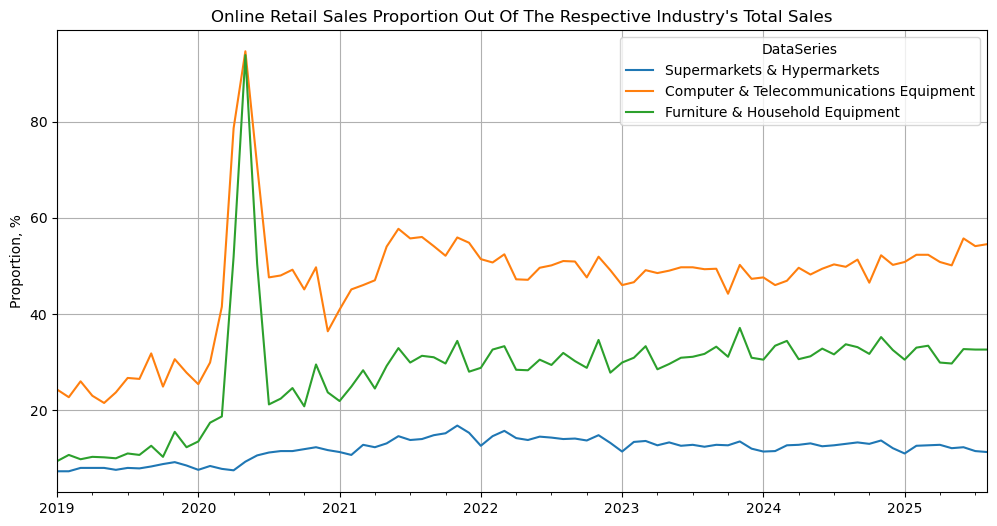

In [35]:
recent_online_sales[["Supermarkets & Hypermarkets", "Computer & Telecommunications Equipment", "Furniture & Household Equipment"]].plot(
                    title = "Online Retail Sales Proportion Out Of The Respective Industry's Total Sales", figsize = (12, 6), 
                    ylabel = "Proportion, %", grid = True
                    )

plt.show()

## Joining the 3 datasets into 1 master dataframe

In [36]:
# Join volume and price tables
master = recent_chained_volume.join(
            recent_current_price, lsuffix = "_Vol", rsuffix = "_Price", how = "inner")

master

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,"Cosmetics, Toiletries & Medical Goods_Price",Wearing Apparel & Footwear_Price,Furniture & Household Equipment_Price,Recreational Goods_Price,Watches & Jewellery_Price,Computer & Telecommunications Equipment_Price,Optical Goods & Books_Price,Others_Price,Total (Excluding Motor Vehicles)_Price,Total YoY % Change_Price
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,58.326,94.111,110.836,99.815,82.802,110.427,111.495,93.410,87.106,NaN
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,55.070,94.598,112.452,106.912,81.896,106.931,111.259,90.316,88.046,NaN
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,53.828,103.034,118.219,105.423,90.065,110.252,117.706,84.147,89.760,NaN
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,56.494,92.777,105.443,102.561,75.715,106.209,108.304,92.111,87.040,NaN
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,56.769,98.212,106.352,110.174,83.104,103.812,110.641,93.792,89.097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,102.395,110.525,110.557,111.905,150.087,139.393,78.447,91.112,112.160,1.576616
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,105.134,114.535,112.280,115.637,133.614,133.040,81.163,86.010,111.354,1.157571
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,105.018,115.722,113.858,112.377,137.553,126.397,79.817,79.577,110.095,2.437070
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,104.501,113.991,111.926,113.715,144.038,133.374,82.120,86.269,114.082,4.780827


In [37]:
# JOin the online proportion table to the master table
master = master.join(recent_online_sales.add_suffix("_Online_%"))
master

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Computer & Telecommunications Equipment_Price,Optical Goods & Books_Price,Others_Price,Total (Excluding Motor Vehicles)_Price,Total YoY % Change_Price,Retail Trade_Online_%,Supermarkets & Hypermarkets_Online_%,Computer & Telecommunications Equipment_Online_%,Furniture & Household Equipment_Online_%,Retail Trade (Excluding Motor Vehicles)_Online_%
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,110.427,111.495,93.410,87.106,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,106.931,111.259,90.316,88.046,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,110.252,117.706,84.147,89.760,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,106.209,108.304,92.111,87.040,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,103.812,110.641,93.792,89.097,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,139.393,78.447,91.112,112.160,1.576616,12.7,12.8,50.8,29.9,14.9
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,133.040,81.163,86.010,111.354,1.157571,12.3,12.1,50.1,29.7,14.5
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,126.397,79.817,79.577,110.095,2.437070,13.5,12.3,55.7,32.7,16.0
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,133.374,82.120,86.269,114.082,4.780827,13.0,11.5,54.1,32.6,15.4


In [38]:
master.shape
master.columns

Index(['Total_Vol', 'Department Stores_Vol', 'Supermarkets & Hypermarkets_Vol',
       'Mini-Marts & Convenience Stores_Vol', 'Food & Alcohol_Vol',
       'Motor Vehicles_Vol', 'Petrol Service Stations_Vol',
       'Cosmetics, Toiletries & Medical Goods_Vol',
       'Wearing Apparel & Footwear_Vol', 'Furniture & Household Equipment_Vol',
       'Recreational Goods_Vol', 'Watches & Jewellery_Vol',
       'Computer & Telecommunications Equipment_Vol',
       'Optical Goods & Books_Vol', 'Others_Vol',
       'Total (Excluding Motor Vehicles)_Vol', 'Total YoY % Change_Vol',
       'Total_Price', 'Department Stores_Price',
       'Supermarkets & Hypermarkets_Price',
       'Mini-Marts & Convenience Stores_Price', 'Food & Alcohol_Price',
       'Motor Vehicles_Price', 'Petrol Service Stations_Price',
       'Cosmetics, Toiletries & Medical Goods_Price',
       'Wearing Apparel & Footwear_Price',
       'Furniture & Household Equipment_Price', 'Recreational Goods_Price',
       'Watches & Jew

In [39]:
# Calculate inflation deflator
master["Inflation Deflator_%"] = ((master["Total_Price"]/master["Total_Vol"]) - 1) * 100

# Compute inflation deflator for all categories
key_categories = ["Supermarkets & Hypermarkets", "Computer & Telecommunications Equipment", "Furniture & Household Equipment"]

for category in key_categories:
    master[f"{category}_Online_Vol"] = master[f"{category}_Vol"] * (master[f"{category}_Online_%"] / 100)
    master[f"{category}_Online_Price"] = master[f"{category}_Price"] * (master[f"{category}_Online_%"] / 100)

# Print sample insights
print("January 2019 Supermarkets (Online Derived):")
print(master.loc['2019-01-01', [f'Supermarkets & Hypermarkets_Vol', f'Supermarkets & Hypermarkets_Online_Vol']].round(2))
print("\nLatest Inflation and Online Share:")
print(master[['Inflation Deflator_%']].tail(1).round(2))

January 2019 Supermarkets (Online Derived):
DataSeries
Supermarkets & Hypermarkets_Vol           95.46
Supermarkets & Hypermarkets_Online_Vol     6.97
Name: 2019-01-01 00:00:00, dtype: float64

Latest Inflation and Online Share:
DataSeries  Inflation Deflator_%
2025-08-01                  8.68


In [40]:
master

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Computer & Telecommunications Equipment_Online_%,Furniture & Household Equipment_Online_%,Retail Trade (Excluding Motor Vehicles)_Online_%,Inflation Deflator_%,Supermarkets & Hypermarkets_Online_Vol,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,NaN,NaN,NaN,-8.118444,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,NaN,NaN,NaN,-3.174951,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,NaN,NaN,NaN,-5.581568,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,NaN,NaN,NaN,-6.129146,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,NaN,NaN,NaN,-5.900469,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,50.8,29.9,14.9,11.010571,14.217344,16.030976,78.528672,70.811644,32.094959,33.056543
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,50.1,29.7,14.5,7.611026,14.134615,15.790379,73.396500,66.653040,32.587137,33.347160
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,55.7,32.7,16.0,8.134593,13.761855,15.436746,77.852447,70.403129,36.069408,37.231566
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,54.1,32.6,15.4,8.643170,13.971465,15.673695,79.275976,72.155334,35.661140,36.487876


In [41]:
# Summary statistics
master.describe().round(2)

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Computer & Telecommunications Equipment_Online_%,Furniture & Household Equipment_Online_%,Retail Trade (Excluding Motor Vehicles)_Online_%,Inflation Deflator_%,Supermarkets & Hypermarkets_Online_Vol,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price
count,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,...,80.00,80.00,80.00,212.00,80.00,80.00,80.00,80.00,80.00,80.00
mean,94.99,92.15,100.79,98.84,102.99,73.58,104.20,86.40,105.34,103.30,...,46.65,28.18,13.63,1.08,13.68,14.68,57.13,53.01,29.30,29.63
std,6.30,15.25,13.41,9.95,19.78,21.57,15.24,15.06,17.99,8.34,...,12.00,11.43,3.81,3.77,3.22,3.51,17.66,15.97,9.32,9.72
min,46.58,8.07,79.38,72.28,41.34,12.28,48.60,55.20,12.40,40.07,...,21.50,9.40,5.70,-8.12,6.97,7.12,19.58,18.59,9.49,9.25
25%,92.78,84.66,91.03,94.62,97.21,59.34,92.85,76.20,98.34,99.41,...,45.78,24.30,12.60,-1.29,12.87,14.04,50.88,48.88,25.71,25.67
50%,95.74,97.67,97.73,101.66,105.34,69.32,101.12,87.73,104.18,104.07,...,49.25,30.05,14.30,0.46,14.10,15.49,63.55,59.14,32.81,33.30
75%,98.09,102.59,110.15,107.00,118.29,88.48,119.29,99.31,109.10,108.59,...,51.32,32.60,15.52,2.30,15.02,16.73,68.24,62.44,35.18,35.91
max,108.13,111.93,167.35,112.92,135.43,137.68,125.24,112.81,143.11,121.92,...,94.60,93.80,26.30,11.01,21.22,22.05,81.74,75.33,40.84,41.39


In [42]:
# Correlations
master[["Total_Vol", "Total_Price", "Inflation Deflator_%"]].corr().round(3)

DataSeries,Total_Vol,Total_Price,Inflation Deflator_%
DataSeries,,,
Total_Vol,1.000,0.854,-0.098
Total_Price,0.854,1.000,0.433
Inflation Deflator_%,-0.098,0.433,1.000


In [43]:
master = master.fillna(method='ffill').fillna(0)
master

C:\Users\DoDoC\AppData\Local\Temp\ipykernel_19212\687831885.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master = master.fillna(method='ffill').fillna(0)


DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Computer & Telecommunications Equipment_Online_%,Furniture & Household Equipment_Online_%,Retail Trade (Excluding Motor Vehicles)_Online_%,Inflation Deflator_%,Supermarkets & Hypermarkets_Online_Vol,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,0.0,0.0,0.0,-8.118444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,0.0,0.0,0.0,-3.174951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,0.0,0.0,0.0,-5.581568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,0.0,0.0,0.0,-6.129146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,0.0,0.0,0.0,-5.900469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,50.8,29.9,14.9,11.010571,14.217344,16.030976,78.528672,70.811644,32.094959,33.056543
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,50.1,29.7,14.5,7.611026,14.134615,15.790379,73.396500,66.653040,32.587137,33.347160
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,55.7,32.7,16.0,8.134593,13.761855,15.436746,77.852447,70.403129,36.069408,37.231566
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,54.1,32.6,15.4,8.643170,13.971465,15.673695,79.275976,72.155334,35.661140,36.487876


In [44]:
master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212 entries, 2008-01-01 to 2025-08-01
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Total_Vol                                             212 non-null    float64
 1   Department Stores_Vol                                 212 non-null    float64
 2   Supermarkets & Hypermarkets_Vol                       212 non-null    float64
 3   Mini-Marts & Convenience Stores_Vol                   212 non-null    float64
 4   Food & Alcohol_Vol                                    212 non-null    float64
 5   Motor Vehicles_Vol                                    212 non-null    float64
 6   Petrol Service Stations_Vol                           212 non-null    float64
 7   Cosmetics, Toiletries & Medical Goods_Vol             212 non-null    float64
 8   Wearing Apparel & Footwear_Vol           

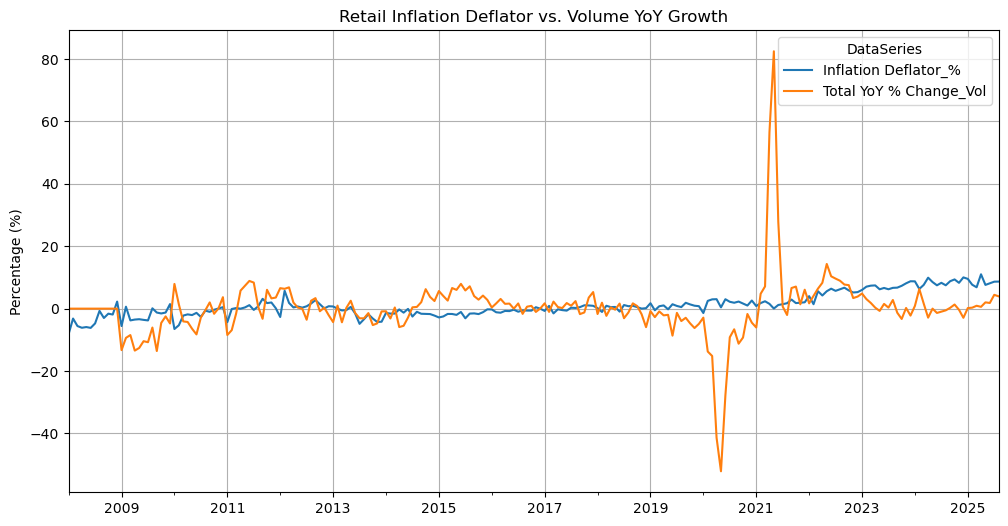

In [45]:
# Plot Inflation and YoY
master[["Inflation Deflator_%", "Total YoY % Change_Vol"]].plot(
        figsize = (12, 6), title = "Retail Inflation Deflator vs. Volume YoY Growth",
        ylabel = "Percentage (%)", grid = True)

plt.show()

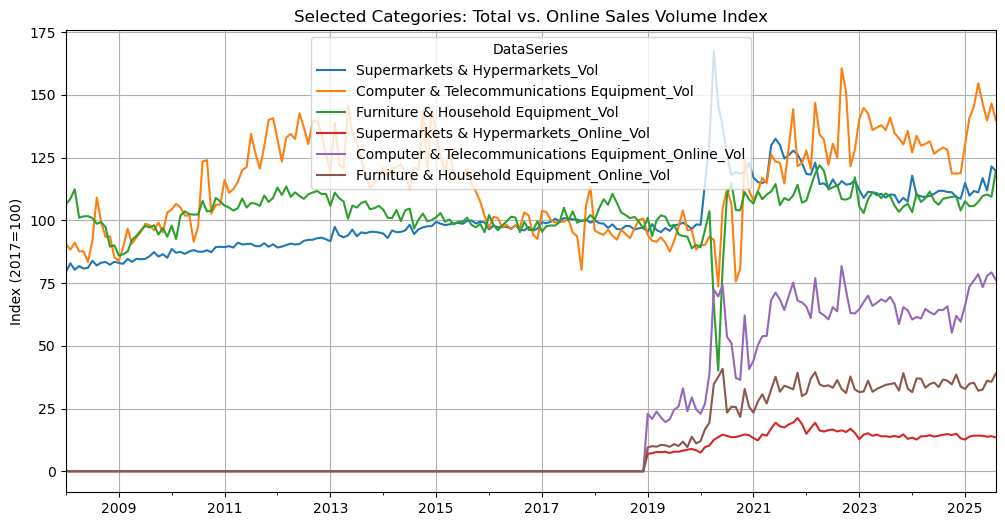

In [46]:
# Plot Total vs Online Derived (Vol)
master[["Supermarkets & Hypermarkets_Vol", "Computer & Telecommunications Equipment_Vol", "Furniture & Household Equipment_Vol",
       "Supermarkets & Hypermarkets_Online_Vol", "Computer & Telecommunications Equipment_Online_Vol", "Furniture & Household Equipment_Online_Vol"]].plot(
    figsize=(12, 6), title='Selected Categories: Total vs. Online Sales Volume Index',
    ylabel='Index (2017=100)', grid=True, legend = True
)
plt.show()

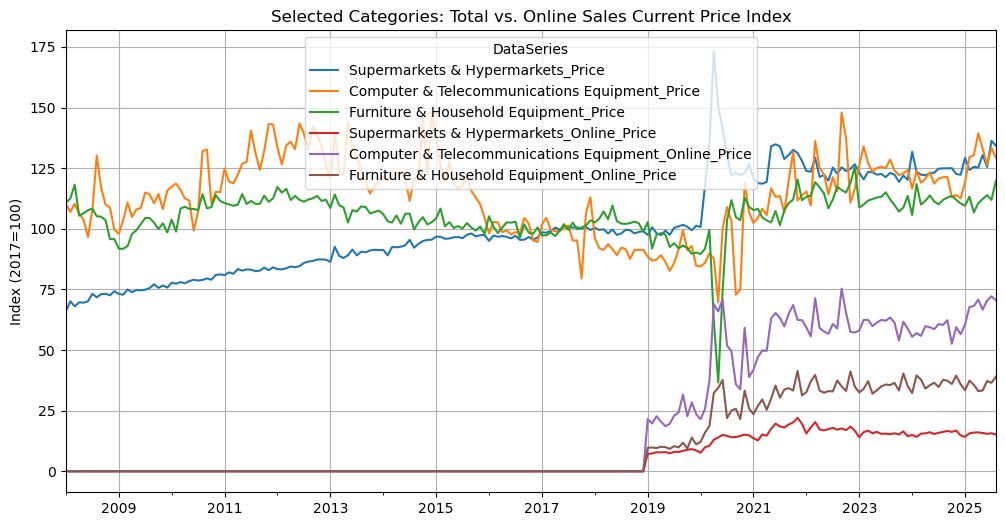

In [47]:
# Plot Total vs Online Derived (Current Price)
master[["Supermarkets & Hypermarkets_Price", "Computer & Telecommunications Equipment_Price", "Furniture & Household Equipment_Price",
       "Supermarkets & Hypermarkets_Online_Price", "Computer & Telecommunications Equipment_Online_Price", "Furniture & Household Equipment_Online_Price"]].plot(
    figsize=(12, 6), title='Selected Categories: Total vs. Online Sales Current Price Index',
    ylabel='Index (2017=100)', grid=True, legend = True
)
plt.show()

In [48]:
# from sqlalchemy import create_engine
# engine = create_engine('sqlite:///retail_dashboard.db')
# master.to_sql("retail_master", con = engine, if_exists = "replace", index_label = "Date")
# print("Export complete.")

In [49]:
# master.to_csv("retail_master.csv", index_label = "Date")
# print("Export complete.")

In [50]:
master

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Computer & Telecommunications Equipment_Online_%,Furniture & Household Equipment_Online_%,Retail Trade (Excluding Motor Vehicles)_Online_%,Inflation Deflator_%,Supermarkets & Hypermarkets_Online_Vol,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,0.0,0.0,0.0,-8.118444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,0.0,0.0,0.0,-3.174951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,0.0,0.0,0.0,-5.581568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,0.0,0.0,0.0,-6.129146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,0.0,0.0,0.0,-5.900469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,50.8,29.9,14.9,11.010571,14.217344,16.030976,78.528672,70.811644,32.094959,33.056543
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,50.1,29.7,14.5,7.611026,14.134615,15.790379,73.396500,66.653040,32.587137,33.347160
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,55.7,32.7,16.0,8.134593,13.761855,15.436746,77.852447,70.403129,36.069408,37.231566
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,54.1,32.6,15.4,8.643170,13.971465,15.673695,79.275976,72.155334,35.661140,36.487876


In [51]:
# Compute deflators for online categories
online_categories = ["Computer & Telecommunications Equipment", "Supermarkets & Hypermarkets", "Furniture & Household Equipment"]

for cat in online_categories:
    master[cat + "_Deflator"] = ((master[cat + "_Price"]/master[cat + "_Vol"])-1) * 100

master

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Inflation Deflator_%,Supermarkets & Hypermarkets_Online_Vol,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price,Computer & Telecommunications Equipment_Deflator,Supermarkets & Hypermarkets_Deflator,Furniture & Household Equipment_Deflator
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,-8.118444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.034966,-16.941295,4.182881
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,-3.174951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.062642,-15.407545,3.662460
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,-5.581568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000472,-15.293239,5.197637
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,-6.129146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.186431,-14.753597,4.339092
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,-5.900469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.405475,-13.956655,4.699837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,11.010571,14.217344,16.030976,78.528672,70.811644,32.094959,33.056543,-9.827020,12.756475,2.996059
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,7.611026,14.134615,15.790379,73.396500,66.653040,32.587137,33.347160,-9.187713,11.714249,2.332279
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,8.134593,13.761855,15.436746,77.852447,70.403129,36.069408,37.231566,-9.568508,12.170532,3.222005
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,8.643170,13.971465,15.673695,79.275976,72.155334,35.661140,36.487876,-8.982093,12.183619,2.318311


In [52]:
# Add COVID dummy (1 for post-March 2020)
master["COVID"] = np.where(master.index >= pd.to_datetime("2020-04-01"), 1, 0)
master

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Supermarkets & Hypermarkets_Online_Vol,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price,Computer & Telecommunications Equipment_Deflator,Supermarkets & Hypermarkets_Deflator,Furniture & Household Equipment_Deflator,COVID
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.034966,-16.941295,4.182881,0
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.062642,-15.407545,3.662460,0
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000472,-15.293239,5.197637,0
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.186431,-14.753597,4.339092,0
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.405475,-13.956655,4.699837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,14.217344,16.030976,78.528672,70.811644,32.094959,33.056543,-9.827020,12.756475,2.996059,1
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,14.134615,15.790379,73.396500,66.653040,32.587137,33.347160,-9.187713,11.714249,2.332279,1
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,13.761855,15.436746,77.852447,70.403129,36.069408,37.231566,-9.568508,12.170532,3.222005,1
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,13.971465,15.673695,79.275976,72.155334,35.661140,36.487876,-8.982093,12.183619,2.318311,1


In [53]:
# Add time trend (months since start)
master["Time"] = np.arange(len(master))
master

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price,Computer & Telecommunications Equipment_Deflator,Supermarkets & Hypermarkets_Deflator,Furniture & Household Equipment_Deflator,COVID,Time
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.034966,-16.941295,4.182881,0,0
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.062642,-15.407545,3.662460,0,1
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.000472,-15.293239,5.197637,0,2
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.186431,-14.753597,4.339092,0,3
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.405475,-13.956655,4.699837,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,16.030976,78.528672,70.811644,32.094959,33.056543,-9.827020,12.756475,2.996059,1,207
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,15.790379,73.396500,66.653040,32.587137,33.347160,-9.187713,11.714249,2.332279,1,208
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,15.436746,77.852447,70.403129,36.069408,37.231566,-9.568508,12.170532,3.222005,1,209
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,15.673695,79.275976,72.155334,35.661140,36.487876,-8.982093,12.183619,2.318311,1,210


In [54]:
# Per-category counts (filtered for valid online data)
cat_counts = {}
for cat in online_categories:
    # Filter for rows where online_% > 0 (valid data) and drop any remaining NaNs
    subset = master[master[cat + "_Online_%"] > 0][[cat + "_Deflator", cat + "_Online_%", "COVID", "Time"]].dropna()
    cat_counts[cat] = len(subset)
    
print("Observations per category (valid online data only):", cat_counts)

Observations per category (valid online data only): {'Computer & Telecommunications Equipment': 80, 'Supermarkets & Hypermarkets': 80, 'Furniture & Household Equipment': 80}


In [55]:
# Pooled panel count (filtered)
panel_data = pd.DataFrame()
for cat in online_categories:
    cat_data = master[master[cat + "_Online_%"] > 0][[cat + "_Deflator", cat + "_Online_%", "COVID", "Time"]].dropna().copy()
    # Rename to generic columns for pooled analysis
    cat_data = cat_data.rename(columns = {
        cat + "_Deflator" : "Deflator",
        cat + "_Online_%" : "Online_Pct"
    })
    cat_data["Category"] = cat
    panel_data = pd.concat([panel_data, cat_data])
    
pooled_count = len(panel_data)
print("Total pooled observations (valid online data only):" , pooled_count)
print("Filtered date range:", panel_data.index.min(), "to", panel_data.index.max())

Total pooled observations (valid online data only): 240
Filtered date range: 2019-01-01 00:00:00 to 2025-08-01 00:00:00


In [56]:
panel_data

DataSeries,Deflator,Online_Pct,COVID,Time,Category
2019-01-01,-5.907155,24.3,0,132,Computer & Telecommunications Equipment
2019-02-01,-5.476903,22.7,0,133,Computer & Telecommunications Equipment
2019-03-01,-4.568606,26.0,0,134,Computer & Telecommunications Equipment
2019-04-01,-4.399258,23.0,0,135,Computer & Telecommunications Equipment
2019-05-01,-5.087332,21.5,0,136,Computer & Telecommunications Equipment
...,...,...,...,...,...
2025-04-01,2.996059,29.9,1,207,Furniture & Household Equipment
2025-05-01,2.332279,29.7,1,208,Furniture & Household Equipment
2025-06-01,3.222005,32.7,1,209,Furniture & Household Equipment
2025-07-01,2.318311,32.6,1,210,Furniture & Household Equipment


In [57]:
# Create a copy of master dataframe that exclude data from pre-2019
master_2019 = master[master.index >= pd.to_datetime("2019-01-01")].copy()
master_2019

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price,Computer & Telecommunications Equipment_Deflator,Supermarkets & Hypermarkets_Deflator,Furniture & Household Equipment_Deflator,COVID,Time
2019-01-01,97.125,96.832,95.460,96.042,96.686,96.495,100.887,103.638,100.776,100.979,...,7.116259,22.880151,21.528585,9.492026,9.656808,-5.907155,2.119212,1.736005,0,132
2019-02-01,96.883,100.109,98.465,98.115,112.358,81.944,100.799,103.661,105.730,93.637,...,7.344895,20.860165,19.717674,10.019159,9.826559,-5.476903,2.183517,-1.922317,0,133
2019-03-01,97.521,100.392,96.118,97.688,100.802,87.904,101.975,108.630,106.905,99.946,...,7.852080,23.788440,22.701640,9.794708,9.563134,-4.568606,2.115109,-2.364277,0,134
2019-04-01,97.146,100.665,95.288,97.867,98.567,87.344,100.476,105.349,107.316,101.948,...,7.789760,21.445890,20.502430,10.500644,10.111613,-4.399258,2.187054,-3.704830,0,135
2019-05-01,97.309,98.526,96.921,97.070,98.234,82.404,100.167,105.386,101.253,101.445,...,7.938720,19.584135,18.587825,10.347390,9.955812,-5.087332,2.386480,-3.784317,0,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,16.030976,78.528672,70.811644,32.094959,33.056543,-9.827020,12.756475,2.996059,1,207
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,15.790379,73.396500,66.653040,32.587137,33.347160,-9.187713,11.714249,2.332279,1,208
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,15.436746,77.852447,70.403129,36.069408,37.231566,-9.568508,12.170532,3.222005,1,209
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,15.673695,79.275976,72.155334,35.661140,36.487876,-8.982093,12.183619,2.318311,1,210


In [58]:
# Summary Statistics
for cat in online_categories:
    print(f"\n{cat} Summary:")
    print(master_2019[[cat + "_Deflator", cat + "_Online_%"]].describe())


Computer & Telecommunications Equipment Summary:
DataSeries  Computer & Telecommunications Equipment_Deflator  \
count                                              80.000000   
mean                                               -6.862258   
std                                                 1.894339   
min                                               -10.804990   
25%                                                -8.320117   
50%                                                -7.196481   
75%                                                -5.214187   
max                                                -3.138140   

DataSeries  Computer & Telecommunications Equipment_Online_%  
count                                              80.000000  
mean                                               46.652500  
std                                                12.004693  
min                                                21.500000  
25%                                                45.7750

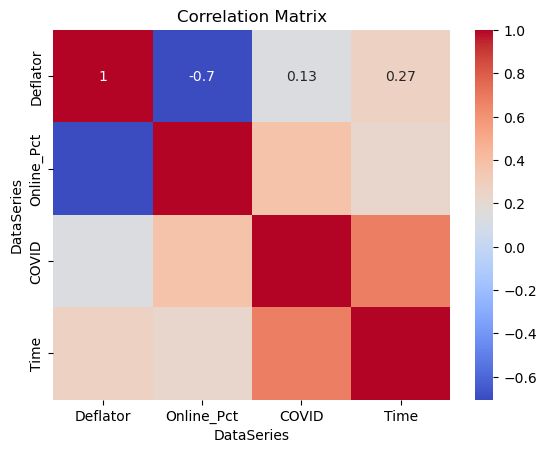

In [59]:
corr_matrix = panel_data[["Deflator", "Online_Pct", "COVID", "Time"]].corr() 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

A strong negative correlation (-0.7) between "Deflator" and "Online_Pct", indicating that higher online proportions are associated with lower deflator values (potential deflationary effects)

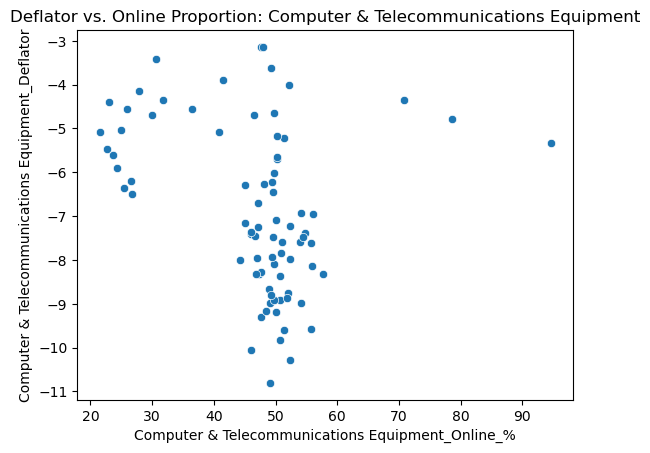

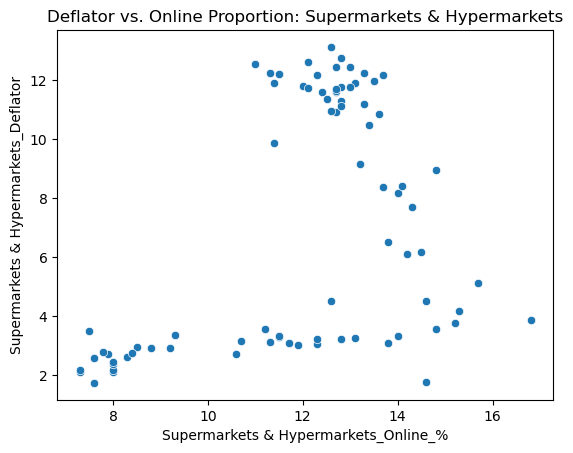

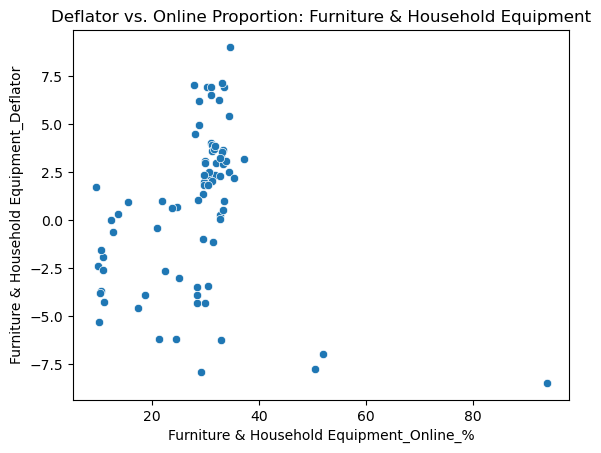

In [60]:
# Scatter plots
for cat in online_categories:
    sns.scatterplot(data = master_2019, x = cat + "_Online_%", y = cat + "_Deflator")
    plt.title(f"Deflator vs. Online Proportion: {cat}")
    plt.show()

In [61]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller
for cat in online_categories:
    result = adfuller(master_2019[cat + "_Deflator"].dropna())
    print(f"{cat} Deflator ADF p-value:", result[1])

Computer & Telecommunications Equipment Deflator ADF p-value: 0.13679404695618574
Supermarkets & Hypermarkets Deflator ADF p-value: 0.9249426954968714
Furniture & Household Equipment Deflator ADF p-value: 0.7320431363306017


The ADF tests assess stationarity in the deflator time series for each category, a prerequisite for valid OLS inference to avoid spurious regressions:

- Computer & Telecommunications Equipment: p-value = 0.1368 (greater than 0.05), failing to reject the null hypothesis of a unit root, indicating non-stationarity.
- Supermarkets & Hypermarkets: p-value = 0.9249 (greater than 0.05), also non-stationary.
- Furniture & Household Equipment: p-value = 0.7320 (greater than 0.05), non-stationary.

Based on the above ADF results, it was determined that running an OLS analysis might take a longer time than planned. Hence analysis will be done on Tableau

In [62]:
master

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Supermarkets & Hypermarkets_Online_Price,Computer & Telecommunications Equipment_Online_Vol,Computer & Telecommunications Equipment_Online_Price,Furniture & Household Equipment_Online_Vol,Furniture & Household Equipment_Online_Price,Computer & Telecommunications Equipment_Deflator,Supermarkets & Hypermarkets_Deflator,Furniture & Household Equipment_Deflator,COVID,Time
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.034966,-16.941295,4.182881,0,0
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.062642,-15.407545,3.662460,0,1
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.000472,-15.293239,5.197637,0,2
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.186431,-14.753597,4.339092,0,3
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.405475,-13.956655,4.699837,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,16.030976,78.528672,70.811644,32.094959,33.056543,-9.827020,12.756475,2.996059,1,207
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,15.790379,73.396500,66.653040,32.587137,33.347160,-9.187713,11.714249,2.332279,1,208
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,15.436746,77.852447,70.403129,36.069408,37.231566,-9.568508,12.170532,3.222005,1,209
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,15.673695,79.275976,72.155334,35.661140,36.487876,-8.982093,12.183619,2.318311,1,210


In [63]:
master_1 = master.drop(columns = ["COVID", "Time"])
master_1.columns

Index(['Total_Vol', 'Department Stores_Vol', 'Supermarkets & Hypermarkets_Vol',
       'Mini-Marts & Convenience Stores_Vol', 'Food & Alcohol_Vol',
       'Motor Vehicles_Vol', 'Petrol Service Stations_Vol',
       'Cosmetics, Toiletries & Medical Goods_Vol',
       'Wearing Apparel & Footwear_Vol', 'Furniture & Household Equipment_Vol',
       'Recreational Goods_Vol', 'Watches & Jewellery_Vol',
       'Computer & Telecommunications Equipment_Vol',
       'Optical Goods & Books_Vol', 'Others_Vol',
       'Total (Excluding Motor Vehicles)_Vol', 'Total YoY % Change_Vol',
       'Total_Price', 'Department Stores_Price',
       'Supermarkets & Hypermarkets_Price',
       'Mini-Marts & Convenience Stores_Price', 'Food & Alcohol_Price',
       'Motor Vehicles_Price', 'Petrol Service Stations_Price',
       'Cosmetics, Toiletries & Medical Goods_Price',
       'Wearing Apparel & Footwear_Price',
       'Furniture & Household Equipment_Price', 'Recreational Goods_Price',
       'Watches & Jew

In [65]:
remaining_categories = ["Department Stores", "Mini-Marts & Convenience Stores", "Food & Alcohol",
                       "Motor Vehicles", "Petrol Service Stations", "Cosmetics, Toiletries & Medical Goods",
                       "Wearing Apparel & Footwear", "Recreational Goods", "Watches & Jewellery", "Optical Goods & Books",
                       "Others"]

for cat in remaining_categories:
    master_1[cat + "_Deflator"] = ((master_1[cat + "_Price"]/master_1[cat + "_Vol"]) - 1) * 100
    
master_1.columns

Index(['Total_Vol', 'Department Stores_Vol', 'Supermarkets & Hypermarkets_Vol',
       'Mini-Marts & Convenience Stores_Vol', 'Food & Alcohol_Vol',
       'Motor Vehicles_Vol', 'Petrol Service Stations_Vol',
       'Cosmetics, Toiletries & Medical Goods_Vol',
       'Wearing Apparel & Footwear_Vol', 'Furniture & Household Equipment_Vol',
       'Recreational Goods_Vol', 'Watches & Jewellery_Vol',
       'Computer & Telecommunications Equipment_Vol',
       'Optical Goods & Books_Vol', 'Others_Vol',
       'Total (Excluding Motor Vehicles)_Vol', 'Total YoY % Change_Vol',
       'Total_Price', 'Department Stores_Price',
       'Supermarkets & Hypermarkets_Price',
       'Mini-Marts & Convenience Stores_Price', 'Food & Alcohol_Price',
       'Motor Vehicles_Price', 'Petrol Service Stations_Price',
       'Cosmetics, Toiletries & Medical Goods_Price',
       'Wearing Apparel & Footwear_Price',
       'Furniture & Household Equipment_Price', 'Recreational Goods_Price',
       'Watches & Jew

In [66]:
master_1

DataSeries,Total_Vol,Department Stores_Vol,Supermarkets & Hypermarkets_Vol,Mini-Marts & Convenience Stores_Vol,Food & Alcohol_Vol,Motor Vehicles_Vol,Petrol Service Stations_Vol,"Cosmetics, Toiletries & Medical Goods_Vol",Wearing Apparel & Footwear_Vol,Furniture & Household Equipment_Vol,...,Mini-Marts & Convenience Stores_Deflator,Food & Alcohol_Deflator,Motor Vehicles_Deflator,Petrol Service Stations_Deflator,"Cosmetics, Toiletries & Medical Goods_Deflator",Wearing Apparel & Footwear_Deflator,Recreational Goods_Deflator,Watches & Jewellery_Deflator,Optical Goods & Books_Deflator,Others_Deflator
2008-01-01,106.683,91.010,79.380,101.222,125.038,129.842,114.311,61.685,92.782,106.386,...,-16.755251,-20.190662,-10.856271,-7.178662,-5.445408,1.432390,5.052940,-21.242961,-9.790040,-6.317384
2008-02-01,104.915,91.792,82.862,104.299,126.643,135.794,114.450,57.954,95.790,108.479,...,-16.445987,-19.156211,-6.316921,-6.427261,-4.976361,-1.244389,3.759778,-21.545786,-9.832890,-6.134963
2008-03-01,105.078,93.738,80.310,103.637,125.995,117.776,115.175,56.469,104.935,112.378,...,-15.713500,-19.160284,-4.950924,-4.240504,-4.676902,-1.811598,4.219267,-15.283970,-9.586284,-7.808357
2008-04-01,107.878,92.801,81.736,106.285,119.564,137.678,116.249,59.198,94.883,101.058,...,-14.729266,-19.046703,-6.154215,-4.660685,-4.567722,-2.219576,4.065791,-19.897803,-9.359177,-7.643331
2008-05-01,108.127,98.496,80.793,104.452,118.734,129.727,117.963,59.642,100.610,101.578,...,-13.438709,-18.533866,-4.067002,-5.017675,-4.817075,-2.383461,2.925954,-20.762777,-9.280168,-4.883985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,94.600,76.727,111.073,80.551,101.178,63.583,78.451,103.519,116.424,107.341,...,19.902919,20.922533,14.220782,33.740806,-1.085791,-5.066825,-5.005051,52.583262,2.749253,1.531124
2025-05-01,98.423,79.550,116.815,78.793,98.541,70.194,78.066,106.916,126.769,109.721,...,19.826634,20.766990,15.746360,34.479799,-1.666729,-9.650624,-5.429520,51.646256,2.372544,-1.862121
2025-06-01,96.944,82.163,111.885,75.469,94.975,67.429,78.982,106.640,123.216,110.304,...,19.904862,21.507765,20.064067,36.486794,-1.521005,-6.082002,-3.645748,49.406947,2.018201,1.947295
2025-07-01,100.241,83.541,121.491,79.995,99.325,73.370,80.961,105.092,124.756,109.390,...,20.003750,21.694437,16.438599,35.628265,-0.562364,-8.628844,-4.681475,53.742208,2.858288,0.604075


In [67]:
# master_1.to_csv("retail_master_v2.csv", index_label = "Date")
# print("Export complete.")

Export complete.
